In [21]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import os

In [13]:
csv_files = glob.glob("data/results_*csv")
len(csv_files)

6

In [16]:
all_dfs = []
for csv_file in csv_files:
    df_temp = pd.read_csv(csv_file)
    # If 'fast' is in the filename, label it as the new method
    if 'fast' in csv_file:
        df_temp['method'] = 'new method (DP + Bits)'
    else:
        df_temp['method'] = 'old algorithm (Sets)'
    all_dfs.append(df_temp)

len(all_dfs)

6

In [17]:
df = pd.concat(all_dfs, ignore_index=True)
df.sort_values(by='file_path', inplace=True)

In [24]:
pivot_df = df.pivot_table(
    index='file_path',
    columns='method',
    values='closure_time',
    aggfunc='mean'  )

pivot_df.index = list(range(len(pivot_df))) 

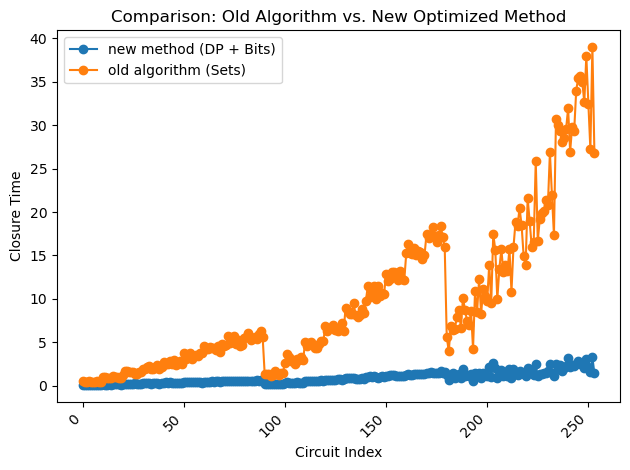

In [28]:
pivot_df.plot(marker='o')
plt.title("Comparison: Old Algorithm vs. New Optimized Method")
plt.xlabel("Circuit Index")
plt.ylabel("Closure Time")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()